# K-Means *(and its extensions)*

TODO:
- label with metrics
- adjust more hyperparameters eg. different n_clusters
- zoo dataset prediction
- other datasets that show limitations / assumptions of kmeans
- other centroid-based methods? CLARA and MeanShift
- scatter plot that highlights differences

In [1]:
import pandas as pd
import numpy as np


from sklearn.cluster import KMeans, MiniBatchKMeans


from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt


import time

In [2]:
datasets = {
    "Spherical Clusters": pd.read_csv("./Datasets/Speherical_Clusters.csv"),
    "Moon Clusters": pd.read_csv("./Datasets/moons_Clusters.csv"),
    "Overlapping Clusters": pd.read_csv("./Datasets/Overlapping_Clusters.csv"),
    # "Hierarchical Structure": pd.read_csv('./Datasets/zoo.csv')
}

In [3]:
scaler = StandardScaler()

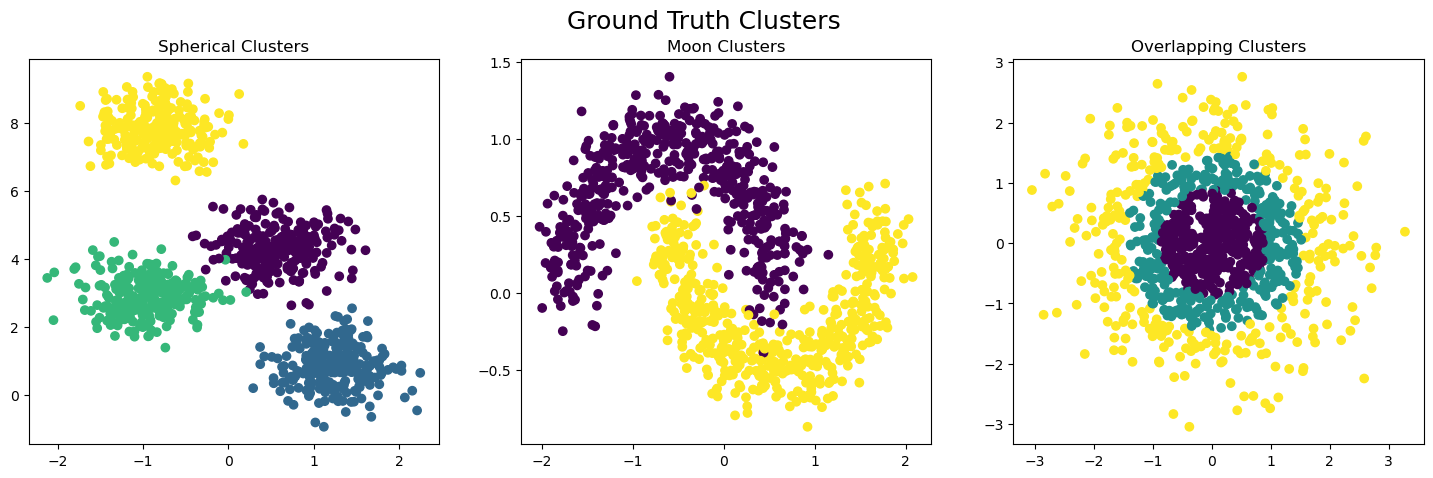

In [4]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

ax_idx = 0

for title, data in datasets.items():
    ax = axes.flat[ax_idx]

    data = data.to_numpy()
    X = scaler.fit_transform(data[:, 0].reshape(-1, 1))
    y = data[:, 1]
    classes = data[:, -1]

    ax.scatter(X, y, c=classes)
    ax.set_title(title)

    ax_idx += 1

figure.suptitle("Ground Truth Clusters", size=18)

plt.show()

In [5]:
def plot_kmeans(
    X: np.ndarray, y: np.ndarray, labels, title: str, subtitle=None, metrics=None
):
    fig = plt.figure(figsize=(8, 6))

    plt.scatter(X, y, c=labels)
    # plt.legend()

    fig.suptitle(title)
    plt.show()

## 1. K-means

In [6]:
default_params = {
    "n_clusters": 8,
    "init": "random",
    "n_init": "auto",
    "max_iter": 300,
    "random_state": 0,
    "algorithm": "lloyd",
}

In [7]:
def run_kmeans(X, params):
    t_start = time.time()
    kmeans = KMeans(**params).fit_predict(X)
    t_elapsed = time.time() - t_start

    return kmeans, t_elapsed

### 1a. Spherical Clusters

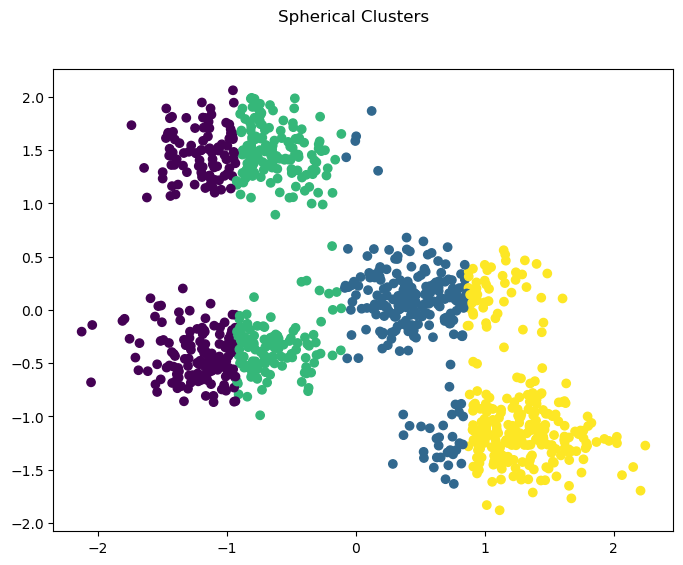

In [8]:
type_data = "Spherical Clusters"
data = scaler.fit_transform(datasets[type_data].to_numpy())
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

train_params = default_params.copy()
train_params['n_clusters'] = 4

y_pred, train_time = run_kmeans(X, train_params)
plot_kmeans(X, y, y_pred, type_data)

### 1b. Moon Clusters

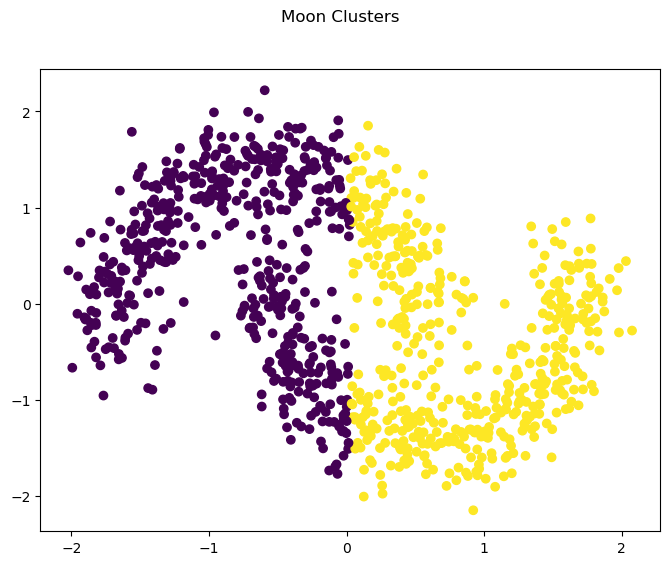

In [9]:
type_data = "Moon Clusters"
data = scaler.fit_transform(datasets[type_data].to_numpy())
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

train_params = default_params.copy()
train_params['n_clusters'] = 2

y_pred, train_time = run_kmeans(X, train_params)
plot_kmeans(X, y, y_pred, type_data)

### 1c. Overlapping Clusters

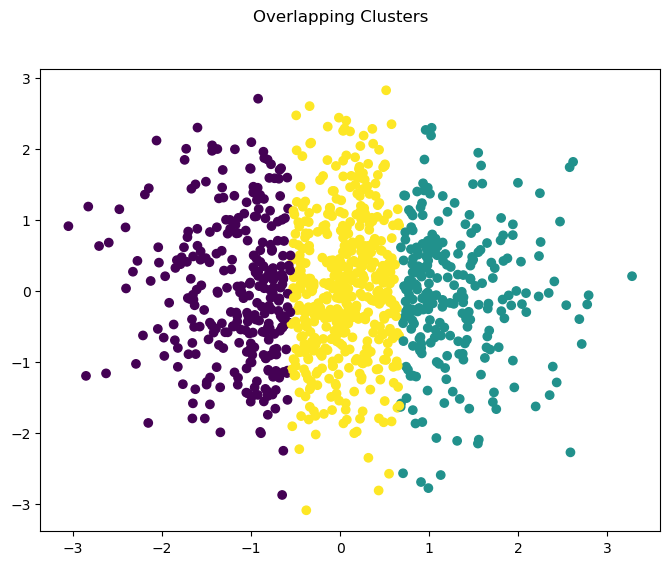

In [10]:
type_data = "Overlapping Clusters"
data = scaler.fit_transform(datasets[type_data].to_numpy())
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

train_params = default_params.copy()
train_params['n_clusters'] = 3

y_pred, train_time = run_kmeans(X, train_params)
plot_kmeans(X, y, y_pred, type_data)

## K-means++

In [13]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# for data, plt in enumerate(axs.flat):
#     X = datasets[data]
#     t_start = time.time()
#     y_pred = KMeans(init="k-means++", n_clusters=3, random_state=42).fit_predict(X)
#     t = time.time() - t_start
#     plt.scatter(X[:, 0], X[:, 1], c=y_pred)
#     plt.set_title(f"train time: {t:.5f}s")

# plt.show()

## Mini-batch K-means

In [12]:
import os


os.environ["OMP_NUM_THREADS"] = "1"


## TODO: userwarning

In [12]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# for data, plt in enumerate(axs.flat):
#     X = datasets[data]
#     t_start = time.time()
#     y_pred = MiniBatchKMeans(
#         init="k-means++", n_clusters=3, batch_size=100, random_state=42
#     ).fit_predict(X)
#     t = time.time() - t_start
#     plt.scatter(X[:, 0], X[:, 1], c=y_pred)
#     plt.set_title(f"train time: {t:.5f}s")

# plt.show()

## Mean Shift / CLARA